In [1]:
# Numpy for array
import numpy as np
# Pyplot for plotting
import matplotlib.pyplot as plt
# Scipy for convex hull (perimiter of points)
from scipy.spatial import ConvexHull, convex_hull_plot_2d

In [2]:
# Map each point to 2d space (return only x and y axis)
def map_two_d(points):
    return points[:, :2]

In [3]:
# Function to plot the projection of the points
def plot_projection(points):
    projection = map_two_d(points)
    plt.plot(projection[:, 0], projection[:, 1],'o', color='black')

In [4]:
# Function to calculate convex hull and plot
def plot_hull(points):
    projection = map_two_d(points)
    hull = ConvexHull(projection)
    convex_hull_plot_2d(hull)
    plt.show()

In [5]:
# Calculate the area of the hull (shadow) given the cubes points
def area_hull(points):
    projection = map_two_d(points)
    hull = ConvexHull(projection)
    return hull.area

In [6]:
# Points which specify the 3d cube [x, y, z]
cube_points = np.array([
    [1, 1, 1],
    [1, 1, -1],
    [1, -1, 1],
    [-1, 1, 1],
    [-1, -1, -1],
    [-1, -1, 1],
    [-1, 1, -1],
    [1, -1, -1]
])

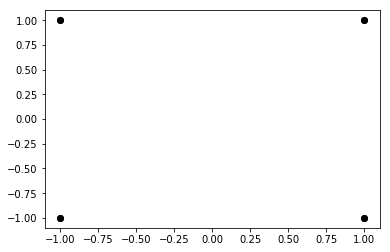

In [7]:
# Plot basic cube
plot_projection(cube_points)

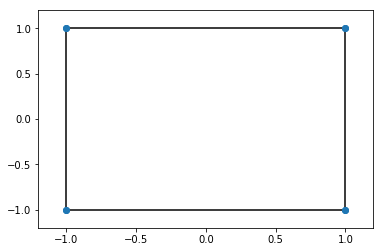

In [8]:
# Calculate convex hull
plot_hull(cube_points)

In [10]:
# Area of convex hull
print(area_hull(cube_points))

8.0
